In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [305]:
data = np.array([
    [20, 10, 1],
    [40, 50, 0],
    [20, 39, 1],
    [50, 160, 0],
    [80, 30, 0]
])

weights = np.random.rand(3)
alpha = 0.5

In [306]:
def learn(input, w):
    x = np.hstack((np.ones((len(input), 1)), input[:, : input.shape[1] - 1]))
    d = input[:, -1]
    
    for j in range(len(input)):
        y = 1 if np.sum(w * x[j]) > 0 else 0
        w[:] = w + alpha * x[j] * (d[j] - y)
        
def accuracy(input, w):
    x = np.hstack((np.ones((len(input), 1)), input[:, : input.shape[1] - 1]))
    d = input[:, - 1]
    sum_right = 0
    
    for j in range(len(input)):
        y = 1 if np.sum(x[j] * w) > 0 else 0
        
        if y == d[j]:
            sum_right += 1
            
    return sum_right / len(input)

In [307]:
for i in range(100000):
    learn(data, weights)
    
    if i % 20000 == 0:
        print(accuracy(data, weights))

0.6
1.0
1.0
1.0
1.0


In [309]:
x_line = np.linspace(10, 50, 100)
weights[2] = -weights[2]
y_line = weights[1] / weights[2] * x_line + weights[0] / weights[2]

color = []
for i in data[:, 2]:
    color.append('r') if i == 0 else color.append('b')

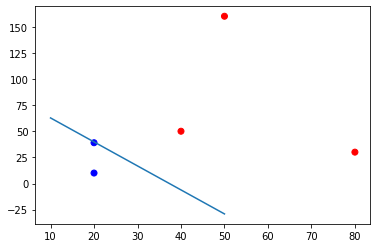

In [310]:
plt.plot(x_line, y_line)
plt.scatter(data[0:, 0], data[0:, 1], c=color)